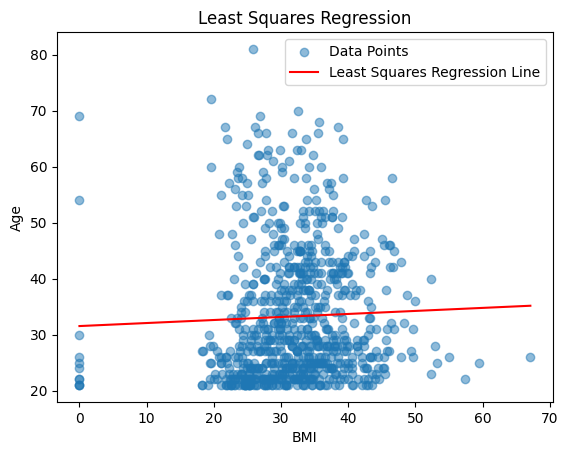

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        next(lines)  # Skip header
        for row in lines:
            for i in range(len(row)):
                row[i] = float(row[i])
            dataset.append(row)
    return dataset

def least_squares_regression(X, y):
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    X_bias = np.c_[np.ones(X.shape[0]), X]
    theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    return theta

def plot_least_squares_regression(X, y, theta):
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    
    # Plotting the regression line
    x_values = np.linspace(min(X), max(X), 100)
    y_values = x_values * theta[1] + theta[0]
    plt.plot(x_values, y_values, color='red', label='Least Squares Regression Line')

    plt.title('Least Squares Regression')
    plt.xlabel('BMI')
    plt.ylabel('Age')
    plt.legend()
    plt.show()

def main():
    filename = 'knn_dataset.csv'
    dataset = load_dataset(filename)

    # Select features
    X = [row[5] for row in dataset]  # BMI
    y = [row[7] for row in dataset]  # Age

    theta = least_squares_regression(X, y)
    plot_least_squares_regression(X, y, theta)

if __name__ == "__main__":
    main()
